# Implementing SVM and Kernel SVM with Python's Scikit-Learn

### Disclaimer

1. This Capstone Project is specially designed for Hacctech's <font color="brown"><b>Data Science with Python</b></font> program (DSP2105) serving the purpose of examining how great the student is in terms of mastering the Machine Learning algorithm, such that laying a solid foundation for future careers.

2. The datasets are from the Internet, and modified by the Course Designer to serve the purpose better. such modification / tuning doesn't alter the copyrights (if any), nor the ownership of the datasets.

__Course Designer__: 
    Marcus Zou


### Section 1 - Machine Learning Algorithm - The Beauty of SVM
A [support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine) (SVM) is a type of supervised machine learning classification algorithm. SVMs were introduced initially in 1960s and were later refined in 1990s. However, it is only now that they are becoming extremely popular, owing to their ability to achieve brilliant results. SVMs are implemented in a unique way when compared to other machine learning algorithms.

In this article we'll see what support vector machines algorithms are, the brief theory behind support vector machine and their implementation in Python's Scikit-Learn library. We will then move towards an advanced SVM concept, known as Kernel SVM, and will also implement it with the help of Scikit-Learn.

#### Simple SVM
In case of linearly separable data in two dimensions, as shown in Fig. 1, a typical machine learning algorithm tries to find a boundary that divides the data in such a way that the misclassification error can be minimized. If you closely look at Fig. 1, there can be several boundaries that correctly divide the data points. The two dashed lines as well as one solid line classify the data correctly.

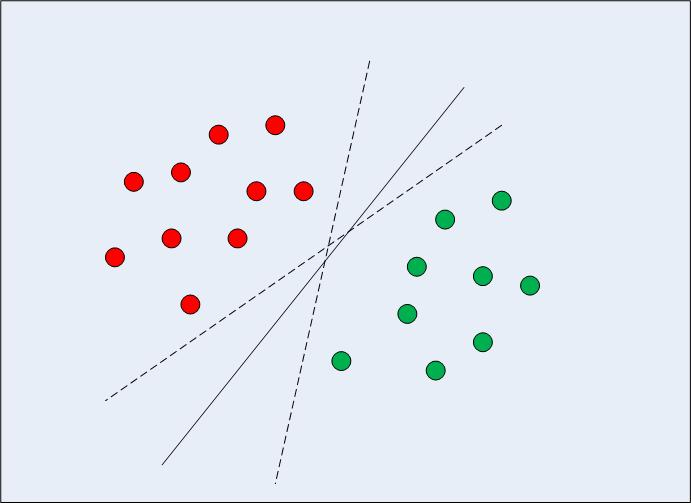

<p style="text-align: center;">Fig 1: Multiple Decision Boundaries</p>

SVM differs from the other classification algorithms in the way that it chooses the [decision boundary](https://en.wikipedia.org/wiki/Decision_boundary) that maximizes the distance from the nearest data points of all the classes. An SVM doesn't merely find a decision boundary; it finds the most optimal decision boundary.

The most optimal decision boundary is the one which has maximum margin from the nearest points of all the classes. The nearest points from the decision boundary that maximize the distance between the decision boundary and the points are called support vectors as seen in Fig 2. The decision boundary in case of support vector machines is called the maximum margin classifier, or the maximum margin hyper plane.

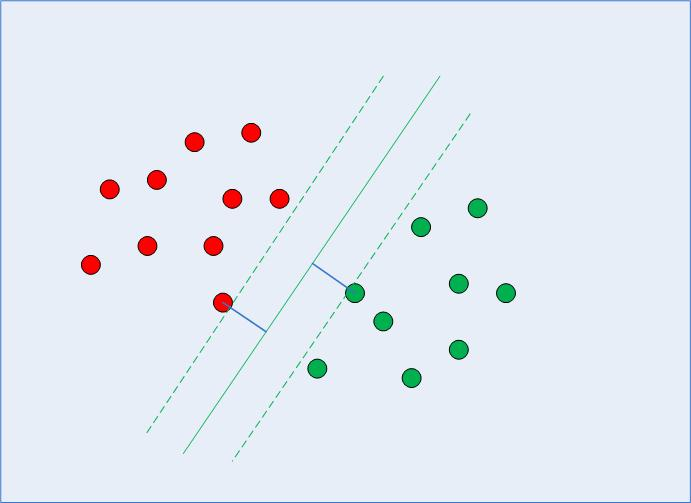

<p style="text-align: center;">Fig 2: Decision Boundary with Support Vectors</p>

There is complex mathematics involved behind finding the support vectors, calculating the margin between decision boundary and the support vectors and maximizing this margin. In this tutorial we will not go into the detail of the mathematics, we will rather see how SVM and Kernel SVM are implemented via the Python Scikit-Learn library.

### Section 2 - The Dataset

The dataset that we are going to use in this section is the <font color="brown">banknote authentication dataset</font> originally from Machine Learning repository, here is the Dataset Description: https://archive.ics.uci.edu/ml/datasets/banknote+authentication#.

The dataset has been downloaded, cleaned and prepared for you, storing the sub-folder of "Datasets".

__Note__: 
* We are going to use the famous online dataset of "```iris```" at Section 5, please be prepared for an online data-pulling at that point.


### Section 3 - Project Target

Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. 
* <b>Variance</b> - variance of the image,
* <b>Skewness</b> - skewness of the wavelet transformed image, 
* <b>Curtosis</b> - curtosis of the image, and
* <b>Entropy</b> - entropy of the image.

Plus the result variable.

* <b>Class</b> - Categorical values: 0 (No) / 1 (Yes). 

This is a binary classification problem and we will use SVM algorithm to solve this problem. The rest of the section consists of standard machine learning steps.

### Section 4 - Simple SVM with linear kernel


__Importing libraries__

The following script imports required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

__Importing the Dataset__

The data file (```bill_authentication.csv```) is available for download at the following link:

https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view 

The detailed information about the data is available at the following link:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Download the dataset from the Google drive link and store it locally on your machine. For this example the CSV file for the dataset is downloaded and stored in the "Datasets" sub-folder of the current work directory. The script reads the file from this path. You can change the file path for your computer accordingly.

To read data from CSV file, the simplest way is to use <font color="brown">read_csv</font> method of the pandas library. The following code reads bank currency note data into pandas dataframe:

In [2]:
bankdata = pd.read_csv("Datasets/bill_authentication.csv")

__Exploratory Data Analysis__

There are virtually limitless ways to analyze datasets with a variety of Python libraries. For the sake of simplicity we will only check the dimensions of the data and see first few records. To see the rows and columns and of the data, execute the following command:

In [3]:
bankdata.shape

(1372, 5)

In the output you will see (1372,5). This means that the bank note dataset has 1372 rows and 5 columns.

To get a feel of how our dataset actually looks, execute the following command:

In [4]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


You can see that all of the attributes in the dataset are numeric. The label is also numeric i.e. 0 and 1.

__Data Preprocessing__

Data preprocessing involves 
1. dividing the data into attributes and labels and 
2. dividing the data into training and testing sets.

To divide the data into attributes (the ```X```s) and labels (the ```y```), execute the following code:

In [5]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

In the first line of the script above, all the columns of the <font color="brown">bankdata</font> dataframe are being stored in the X variable except the "Class" column, which is the label column. The <font color="brown">drop()</font> method drops this column.

In the second line, only the class column is being stored in the <font color="brown">y</font> variable. At this point of time X variable contains attributes while y variable contains corresponding labels.

Once the data is divided into attributes and labels, the final preprocessing step is to divide data into training and test sets. Luckily, the <font color="brown">model_selection</font> library of the Scikit-Learn library contains the <font color="brown">train_test_split</font> method that allows us to seamlessly divide data into training and test sets.

Execute the following script to do so:

In [6]:
# Your codes below



__Training the Algorithm__

We have divided the data into training and testing sets. Now is the time to train our SVM on the training data. Scikit-Learn contains the <font color="brown">svm</font> library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as <font color="brown">SVC</font> in the Scikit-Learn's <font color="brown">svm</font> library. This class takes one parameter, which is the kernel type. This is very important. In the case of a simple SVM we simply set this parameter as "linear" since simple SVMs can only classify linearly separable data. We will see non-linear kernels in the next section.

The <font color="brown">fit</font> method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the <font color="brown">fit</font> method. Execute the following code to train the algorithm:

In [7]:
# Your codes below




SVC(kernel='linear')

__Making Predictions__

To make predictions, the <font color="brown">predict</font> method of the <font color="brown">SVC</font> class is used. Take a look at the following code:

In [8]:
# Your codes below


__Evaluating the Algorithm__

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's <font color="brown">metrics</font> library contains the <font color="brown">classification_report</font> and <font color="brown">confusion_matrix</font> methods, which can be readily used to find out the values for these important metrics.

Here is the code for finding these metrics:

In [9]:
# Your codes below




[[156   0]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       156
           1       1.00      0.99      1.00       119

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



__Results__

The evaluation results are as above.
From the results it can be observed that SVM slightly outperformed the decision tree algorithm. There is only one misclassification in the case of SVM algorithm compared to four misclassifications in the case of the decision tree algorithm.

### Section 5 - Kernel SVM

In the previous section we saw how the simple SVM algorithm can be used to find decision boundary for linearly separable data. However, in the case of non-linearly separable data, such as the one shown in Fig. 3, a straight line cannot be used as a decision boundary.

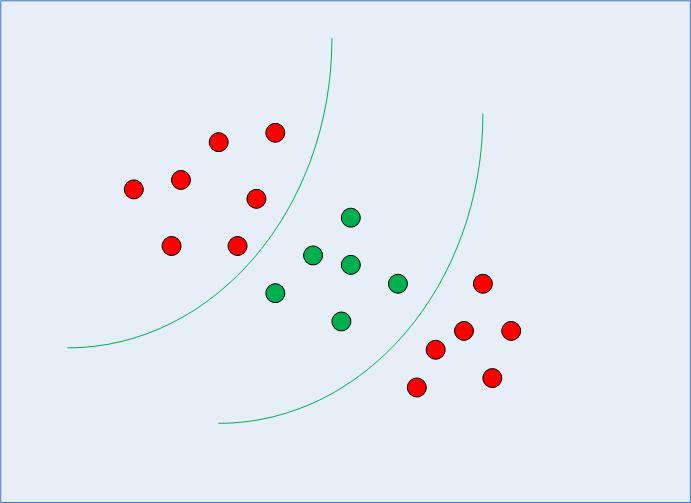

<p style="text-align: center;">Fig 3: Non-linearly Separable Data</p>

In case of non-linearly separable data, the simple SVM algorithm cannot be used. Rather, a modified version of SVM, called Kernel SVM, is used.

Basically, the kernel SVM projects the non-linearly separable data lower dimensions to linearly separable data in higher dimensions in such a way that data points belonging to different classes are allocated to different dimensions. Again, there is complex mathematics involved in this, but you do not have to worry about it in order to use SVM. Rather we can simply use Python's Scikit-Learn library that to implement and use the kernel SVM.

__Implementing Kernel SVM with Scikit-Learn__

Implementing Kernel SVM with Scikit-Learn is similar to the simple SVM. In this section, we will use the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to predict the category to which a plant belongs based on four attributes: sepal-width, sepal-length, petal-width and petal-length.

The dataset can be downloaded from the following link:

https://archive.ics.uci.edu/ml/datasets/iris4

The rest of the steps are typical machine learning steps and need very little explanation until we reach the part where we train our Kernel SVM.

__Importing Libraries__

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

__Importing the Dataset__

Please be prepared with an Internet connection for online data pulling of the famous "```iris```" dataset.

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)

__Preprocessing__

In [12]:
X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

__Train Test Split__

In [13]:
# Your codes below



__Training the Algorithm__

To train the kernel SVM, we use the same <font color="brown">SVC</font> class of the Scikit-Learn's <font color="brown">svm</font> library. The difference lies in the value for the kernel parameter of the <font color="brown">SVC</font> class. In the case of the simple SVM we used "linear" as the value for the kernel parameter. However, for kernel SVM you can use Gaussian, polynomial, sigmoid, or computable kernel. We will implement polynomial, Gaussian, and sigmoid kernels to see which one works better for our problem.

<font color="brown">1. Polynomial Kernel</font>

In the case of [polynomial kernel](https://en.wikipedia.org/wiki/Polynomial_kernel), you also have to pass a value for the <font color="brown">degree</font> parameter of the <font color="brown">SVC</font> class. This basically is the degree of the polynomial. Take a look at how we can use a polynomial kernel to implement kernel SVM:

In [14]:
# Your codes below




SVC(degree=8, kernel='poly')

__Making Predictions__

Now once we have trained the algorithm, the next step is to make predictions on the test data.

Execute the following script to do so:

In [15]:
# Your codes below


__Evaluating the Algorithm__

As usual, the final step of any machine learning algorithm is to make evaluations for polynomial kernel. Execute the following script:

In [16]:
# Your codes below




[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



The output for the kernel SVM using polynomial kernel looks as above.

<font color="brown">2. Gaussian Kernel</font>

Take a look at how we can use Gaussian kernel to implement kernel SVM:

In [17]:
# Your codes below




SVC()

To use Gaussian kernel, you have to specify '<font color="brown">rbf</font>' as value for the Kernel parameter of the SVC class.

__Prediction__

In [18]:
# Your codes below


__Evaluation__

In [19]:
# Your codes below




[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



The output of the Kernel SVM with Gaussian kernel looks like above.

<font color="brown">3. Sigmoid Kernel</font>

Finally, let's use a sigmoid kernel for implementing Kernel SVM. Take a look at the following script:

In [20]:
# Your codes below




SVC(kernel='sigmoid')

To use the sigmoid kernel, you have to specify '<font color="brown">sigmoid</font>' as value for the kernel parameter of the <font color="brown">SVC</font> class.

__Prediction and Evaluation__

In [21]:
# Your codes below


In [22]:
# Your codes below




[[ 0 11  0]
 [ 0  9  0]
 [ 0 10  0]]
                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        11
Iris-versicolor       0.30      1.00      0.46         9
 Iris-virginica       0.00      0.00      0.00        10

       accuracy                           0.30        30
      macro avg       0.10      0.33      0.15        30
   weighted avg       0.09      0.30      0.14        30



C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The output of the Kernel SVM with <font color="brown">Sigmoid</font> kernel looks like above.

__Note__:

It's OK if the above codes throw a message, something like below. Please go ahead to next steps.

<font color="red">UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior</font>. 

### Section 6 - Comparison of Kernel Performance

__Your observations/comments go below__. At least 3 points to be mentioned.

1. 
2. 
3. 

### Section 7 - Conclusion

In this article we studied both simple and kernel SVMs. We studied the intuition behind the SVM algorithm and how it can be implemented with Python's Scikit-Learn library. We also studied different types of kernels that can be used to implement kernel SVM. I would suggest you try to implement these algorithms on real-world datasets available at places like [kaggle.com](https://www.kaggle.com/).

I would also suggest that you explore the actual mathematics behind the SVM. Although you are not necessarily going to need it in order to use the SVM algorithm, it is still very handy to know what is actually going on behind the scene while your algorithm is finding decision boundaries.

### Section 8 - Resources

Want to learn more about SVMs, Scikit-Learn, and other useful machine learning algorithms? I'd recommend checking out some more detailed resources, like one of these books:

* [Learning with Kernels: Support Vector Machines, Regularization, Optimization, and Beyond](http://stackabu.se/learning-with-kernels-svms-regularization-optimization)
* [Python Data Science Handbook: Essential Tools for Working with Data](http://stackabu.se/python-data-science-handbook-essential-tools)
* [Data Science from Scratch: First Principles with Python](http://stackabu.se/data-science-from-scratch-first-principles-python)

### The End